### Import packages we need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

The data I will be using is from PDP database, including all the pesticides data from 1994-2021

In [18]:
df = pd.read_csv('PDP_Analytical.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Sample ID Commod Pesticide Code  Pesticide Name Test Class  \
0  CA0307280363AACA1      AA            160    Chlorpyrifos          C   
1  CA0310280484AACA1      AA             83  O-Phenylphenol          I   
2  CA0311250391AACA1      AA             83  O-Phenylphenol          I   
3  FL0308220056AAFL1      AA            160    Chlorpyrifos          C   
4  MI0307280000AAFL1P     AA            160    Chlorpyrifos          C   

   Concentration     LOD pp_ Confirm 1 Confirm 2 Annotate Quantitate Mean  \
0         0.0250  0.0040   M         C         M      NaN          M    O   
1         0.0170  0.0100   M        MO       NaN       QV          H    O   
2         0.0170  0.0100   M        MO       NaN       QV          H    O   
3         0.0063  0.0038   M       NaN       NaN       Q           M    O   
4         0.0170  0.0038   M         D       NaN      NaN          M    O   

  Extract  Determ EPA Tolerance (ppm)  
0   552.0     2.0                   5  
1   550.0     7.0                  NT  
2   550.0     7.0                  NT  
3   802.0    60.0                   5  
4   551.0    60.0                   5

### Process data

First of all, I will extract the date from Sample ID column and add a new column called Date.

In [19]:
dates = []      #extract the dates from Sample ID
for i in range(len(df)):
    sample_id = df["Sample ID"][i]
    year = sample_id[2:4]
    if (int(year) < 90):
        year = '20'+ year
    else:
        year = '19' + year
    month = sample_id[4:6]
    day = sample_id[6:8]
    d = year + '-' + month + '-' + day
    date = pd.to_datetime(d)
    dates.append(date)
df["Date"] = dates
df.head()

Sample ID Commod Pesticide Code  Pesticide Name Test Class  \
0  CA0307280363AACA1      AA            160    Chlorpyrifos          C   
1  CA0310280484AACA1      AA             83  O-Phenylphenol          I   
2  CA0311250391AACA1      AA             83  O-Phenylphenol          I   
3  FL0308220056AAFL1      AA            160    Chlorpyrifos          C   
4  MI0307280000AAFL1P     AA            160    Chlorpyrifos          C   

   Concentration     LOD pp_ Confirm 1 Confirm 2 Annotate Quantitate Mean  \
0         0.0250  0.0040   M         C         M      NaN          M    O   
1         0.0170  0.0100   M        MO       NaN       QV          H    O   
2         0.0170  0.0100   M        MO       NaN       QV          H    O   
3         0.0063  0.0038   M       NaN       NaN       Q           M    O   
4         0.0170  0.0038   M         D       NaN      NaN          M    O   

  Extract  Determ EPA Tolerance (ppm)       Date  
0   552.0     2.0                   5 2003-07-28  
1   550.0     7.0                  NT 2003-10-28  
2   550.0     7.0                  NT 2003-11-25  
3   802.0    60.0                   5 2003-08-22  
4   551.0    60.0                   5 2003-07-28

There are different units in the pp_ column so we need to convert all ppt(parts per trillion) to ppm(parts per million)

In [20]:
# Convert parts per trillion to parts per million where pp_ is 'T'
df.loc[df['pp_'] == 'T', 'Concentration'] = df['Concentration'] / 1000000
df.loc[df['pp_'] == 'T', 'LOD'] = df['LOD'] / 1000000
df.loc[df['pp_'] == 'T', 'pp_'] = 'M'
df.head()

Sample ID Commod Pesticide Code  Pesticide Name Test Class  \
0  CA0307280363AACA1      AA            160    Chlorpyrifos          C   
1  CA0310280484AACA1      AA             83  O-Phenylphenol          I   
2  CA0311250391AACA1      AA             83  O-Phenylphenol          I   
3  FL0308220056AAFL1      AA            160    Chlorpyrifos          C   
4  MI0307280000AAFL1P     AA            160    Chlorpyrifos          C   

   Concentration     LOD pp_ Confirm 1 Confirm 2 Annotate Quantitate Mean  \
0         0.0250  0.0040   M         C         M      NaN          M    O   
1         0.0170  0.0100   M        MO       NaN       QV          H    O   
2         0.0170  0.0100   M        MO       NaN       QV          H    O   
3         0.0063  0.0038   M       NaN       NaN       Q           M    O   
4         0.0170  0.0038   M         D       NaN      NaN          M    O   

  Extract  Determ EPA Tolerance (ppm)       Date  
0   552.0     2.0                   5 2003-07-28  
1   550.0     7.0                  NT 2003-10-28  
2   550.0     7.0                  NT 2003-11-25  
3   802.0    60.0                   5 2003-08-22  
4   551.0    60.0                   5 2003-07-28

Sum up the concentration for each pesticide and sort it by values from highest to smallest

In [23]:
tops = df.groupby('Pesticide Name')['Concentration'].sum()
tops = tops.sort_values(ascending=False)
tops.head()

Pesticide Name
Chlorpropham        9546.598300
Iprodione           7307.005000
Permethrin Total    6855.677900
Thiabendazole       6817.091700
Fludioxonil         4424.804862
Name: Concentration, dtype: float64

### Create Graph

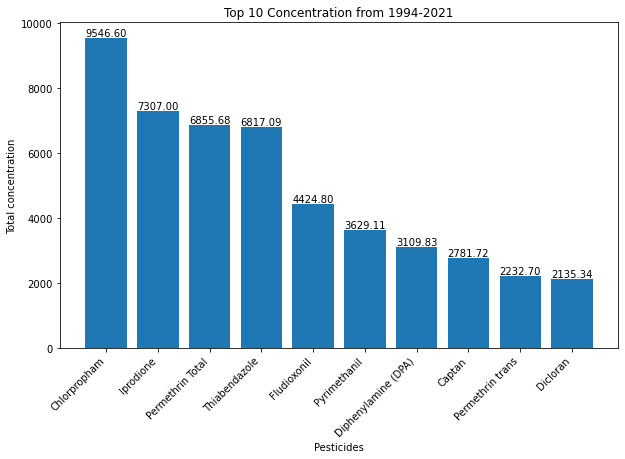

In [25]:
top10 = tops.head(10)
plt.figure(figsize=(10,6))
plt.bar(top10.index.values, top10.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Concentration from 1994-2021")
plt.xlabel("Pesticides")
plt.ylabel("Total concentration")
for i, v in enumerate(top10.values):
        plt.annotate("{:.2f}".format(v), xy=(i, v), xytext=(i, v+0.5),
                 ha='center', va='bottom')
plt.show()

This graph shows the ten pesticides with the most concentrations in commodities from 1994 to 2021. This figure will be used to shown in the reports to give a brief overview of the concentrations of pesticides.

In order to export this figure, we can use the code below to save it as a file.

In [26]:
 plt.savefig('top10_concentration.png')

<Figure size 432x288 with 0 Axes>